## Importing all the required module and calling the .csv file in our .ipynb notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
price = pd.read_csv("RealEstate.csv")

In [3]:
price.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
price.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Creating the Histogram of each features present in dataset

array([[<AxesSubplot:title={'center':'No'}>,
        <AxesSubplot:title={'center':'X1 transaction date'}>,
        <AxesSubplot:title={'center':'X2 house age'}>],
       [<AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>,
        <AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>,
        <AxesSubplot:>]], dtype=object)

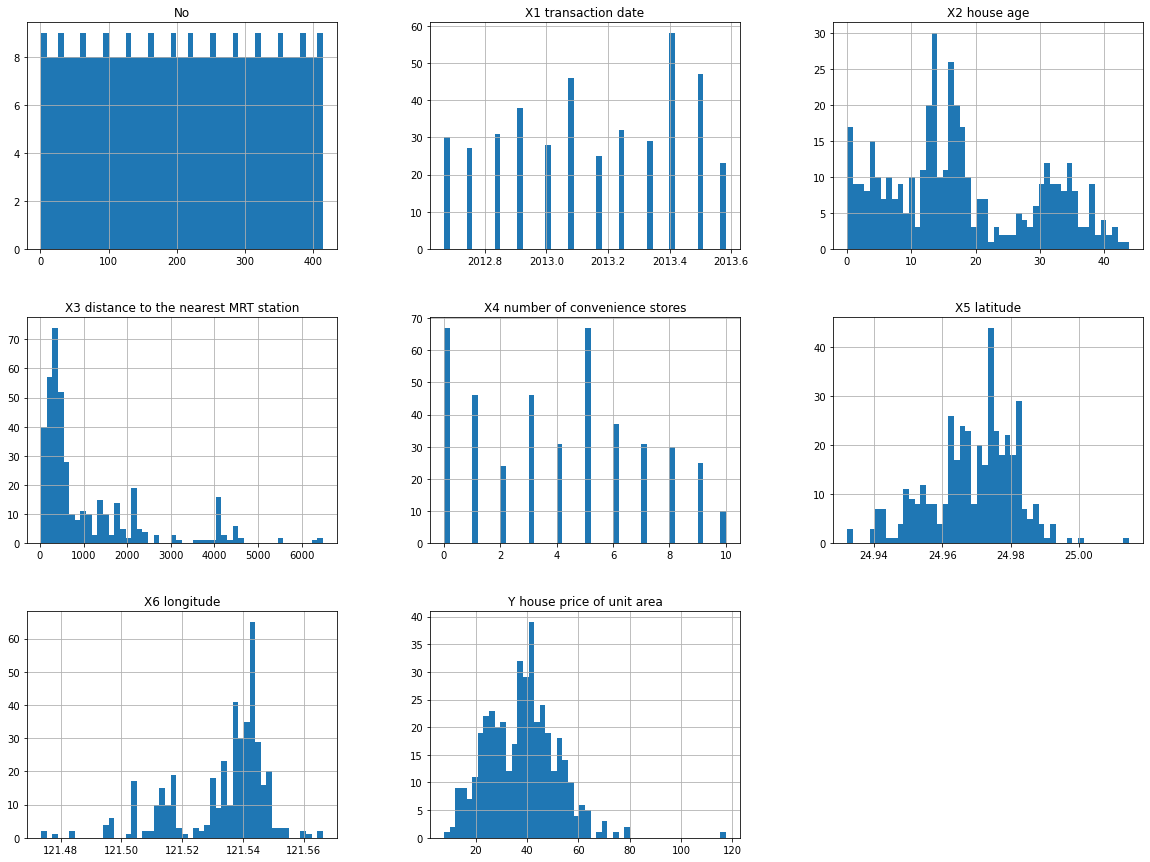

In [6]:
price.hist(bins=50, figsize=(20,15))

## Checking the Correlation of every feature with 'house price of unit area'

In [7]:
correlation = price.corr()
correlation['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

## Creating the feature and label ('house price of unit area')

In [8]:
feature = price.drop(['Y house price of unit area','No'], axis=1)
label = price['Y house price of unit area']

## Train test Splitting using sklearn (Ratio: 70:30)

In [9]:
from sklearn.model_selection import train_test_split
feature_train_set, feature_test_set, label_train_set, label_test_set = train_test_split(feature, label, test_size=0.3, random_state=42)

In [10]:
feature_train_set.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
7,2013.417,20.3,287.60250,6,24.98042,121.54228
194,2013.500,15.2,3771.89500,0,24.93363,121.51158
19,2012.667,1.5,23.38284,7,24.96772,121.54102
176,2012.833,13.9,4573.77900,0,24.94867,121.49507
367,2012.833,15.0,1828.31900,2,24.96464,121.51531


## LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()
algo1.fit(feature_train_set, label_train_set)

LinearRegression()

In [12]:
algo1.coef_

array([ 5.84779706e+00, -2.42545813e-01, -5.13873381e-03,  1.07449530e+00,
        2.39096949e+02, -5.22351591e+01])

In [13]:
algo1.intercept_

-11350.740518771496

In [14]:
pre1 = algo1.predict(feature_test_set)
pd.DataFrame({'Price of a Unit Area(Correct Value)':label_test_set,'Predicted Price':pre1})

,Price of a Unit Area(Correct Value),Predicted Price
358,45.1,47.554302
350,42.3,41.083727
373,52.2,44.255517
399,37.3,40.516851
369,22.8,27.434676
...,...,...
268,40.1,46.209098
148,45.1,14.580938
16,70.1,50.407471
66,50.7,46.601975


## Checking the model of Linear Regression by various metrices(MSE,MAE,RMS)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_sq = mean_squared_error(pre1, label_test_set)
mean_abs = mean_absolute_error(pre1, label_test_set)
rms = np.sqrt(mean_sq)

In [16]:
mean_sq, mean_abs, rms

(73.56837932850077, 6.18483634009705, 8.577201136064186)

## Result of LinearRegression Evaluation
## mean_sq, mean_abs, rms = (73.56837932850077, 6.18483634009705, 8.577201136064186)
## Intercept = -11350.740518771496

## Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
algo2 = DecisionTreeRegressor()
algo2.fit(feature_train_set, label_train_set)

DecisionTreeRegressor()

In [18]:
pre2 = algo2.predict(feature_test_set)
pd.DataFrame({'Price of a Unit Area(Correct Value)':label_test_set,'Predicted Price':pre2})

,Price of a Unit Area(Correct Value),Predicted Price
358,45.1,48.6
350,42.3,38.9
373,52.2,43.5
399,37.3,29.3
369,22.8,25.7
...,...,...
268,40.1,40.6
148,45.1,18.2
16,70.1,69.7
66,50.7,54.4


## Checking the model of Decision Tree Regression by various metrices(MSE,MAE,RMS)

In [19]:
mean_sq = mean_squared_error(pre2, label_test_set)
mean_abs = mean_absolute_error(pre2, label_test_set)
rms = np.sqrt(mean_sq)

In [20]:
mean_sq, mean_abs, rms

(66.74762, 5.3012, 8.169921664251133)

## Result of Decision Tree Regressor

## mean_sq, mean_abs, rms = (72.8629, 5.6796, 8.535976804092195)

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
algo3 = RandomForestRegressor()
algo3.fit(feature_train_set, label_train_set)

RandomForestRegressor()

In [22]:
pre3 = algo3.predict(feature_test_set)
pd.DataFrame({'Price of a Unit Area(Correct Value)':label_test_set,'Predicted Price':pre3})

,Price of a Unit Area(Correct Value),Predicted Price
358,45.1,48.574750
350,42.3,38.798000
373,52.2,52.744250
399,37.3,34.118000
369,22.8,25.820000
...,...,...
268,40.1,41.424833
148,45.1,24.495000
16,70.1,66.863500
66,50.7,52.232917


## Checking the model of Random Forest Regressor by various metrices(MSE,MAE,RMS)

In [23]:
mean_sq = mean_squared_error(pre3, label_test_set)
mean_abs = mean_absolute_error(pre3, label_test_set)
rms = np.sqrt(mean_sq)

In [24]:
mean_sq, mean_abs, rms

(42.75676588782264, 4.334511942857144, 6.538865795214231)

## Result of Random Forest Regressor
## mean_sq, mean_abs, rms = (44.826556491897776, 4.459660533333336, 6.695263735798447)

## XgBoost

In [25]:
import xgboost as xgb

In [26]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth = 3, learning_rate=0.1, random_state=42)
model.fit(feature_train_set, label_train_set)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [27]:
pre4 = model.predict(feature_test_set)
pd.DataFrame({'Price of a Unit Area(Correct Value)':label_test_set,'Predicted Price':pre4})

,Price of a Unit Area(Correct Value),Predicted Price
358,45.1,48.145119
350,42.3,37.904346
373,52.2,51.828209
399,37.3,34.329784
369,22.8,24.114796
...,...,...
268,40.1,41.383808
148,45.1,25.361122
16,70.1,64.935081
66,50.7,48.073647


## Checking the model of XgBoost Regressor by various metrices(MSE,MAE,RMS)

In [28]:
mean_sq = mean_squared_error(pre4, label_test_set)
mean_abs = mean_absolute_error(pre4, label_test_set)
rms = np.sqrt(mean_sq)

In [29]:
mean_sq, mean_abs, rms

(44.72055443197218, 4.625200880432129, 6.687342852880521)

## Result for XgBoost Regressor
## mean_sq, mean_abs, rms = (44.72055443197218, 4.625200880432129, 6.687342852880521)

## 
## Out of all the algorithms which we have used we found the best result using the XgBoost 
## Regressor, Hence we are finalizing XgBoost algorithm as a main Algorithm for our prediction.

In [30]:
feature_test_set['Predicted Price'] = pre4

In [31]:
feature_test_set

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Predicted Price
358,2013.167,1.1,193.5845,6,24.96571,121.54089,48.145119
350,2013.000,13.2,492.2313,5,24.96515,121.53737,37.904346
373,2013.083,0.0,274.0144,1,24.97480,121.53059,51.828209
399,2012.917,12.7,170.1289,1,24.97371,121.52984,34.329784
369,2012.667,20.2,2185.1280,3,24.96322,121.51237,24.114796
...,...,...,...,...,...,...,...
268,2013.417,17.2,390.5684,5,24.97937,121.54245,41.383808
148,2013.500,16.4,3780.5900,0,24.93293,121.51203,25.361122
16,2013.250,0.0,292.9978,6,24.97744,121.54458,64.935081
66,2013.000,1.0,193.5845,6,24.96571,121.54089,48.073647


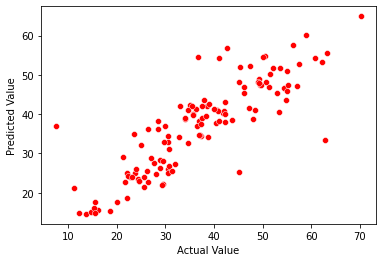

In [37]:
sns.scatterplot(x= label_test_set,y= pre4, color='red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

## The above Dataset is a final Dataset which has the predicted value column which is calculated using the XgBoost Regressor